In [1]:
#https://www.kaggle.com/granjithkumar/arima-time-series-forecasting-with-python7
#https://www.kaggle.com/granjithkumar/arima-time-series-forecasting-with-python

#importeren van packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#update sns
#import sys
#!{sys.executable} -m pip install seaborn

In [4]:
sunspots = pd.read_csv('sunspots.csv')

### Data exploratie en preparatie

In [5]:
#bekijken van de dataset: datatypes
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3235 non-null   int64  
 1   Date                               3235 non-null   object 
 2   Monthly Mean Total Sunspot Number  3235 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.9+ KB


> We zien dat de dataset een beperkt aantal kolommen heeft. 2 kolommen zijn numeriek (int of float) en 1 kolom is een object. De eerste kolom heeft ook geen kolomnnaam. In de dataset zitten 3235 rijen.

In [6]:
sunspots.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [7]:
sunspots.tail()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
3230,3230,2018-03-31,2.5
3231,3231,2018-04-30,8.9
3232,3232,2018-05-31,13.2
3233,3233,2018-06-30,15.9
3234,3234,2018-07-31,1.6


> Het lijkt er op dat de date kolom start in het jaar 1749 en loopt tot en met het jaar 2018. Vermoedelijk is er per maand een sprong en is de dag telkens de laatste dag van de maand.

> De eerste kolom lijkt een autonumber kolom te zijn die start bij nul. Deze loopt identiek aan de index en mag verwijdert worden.

In [8]:
#verwijderen van de 'autonumber' kolom
sunspots.drop('Unnamed: 0',axis=1, inplace =True)


In [9]:
#hernoemen kolommen (lowercase en snakecasing)
sunspots.columns = ['date','monthly_mean_total_sunspot_number']

In [10]:
#statistische info bekijken mbt sunspots
sunspots.describe()

,monthly_mean_total_sunspot_number
count,3235.000000
mean,82.481082
std,67.805190
min,0.000000
25%,24.750000
50%,68.300000
75%,122.900000
max,398.200000


> het minimum gemiddeld aantal sunspots per maand gaat van 0 tot maximaal 398.2

In [11]:
#omzetten van de Data kolom: van object naar datetime object

sunspots['date']=pd.to_datetime(sunspots['date']) 
print(type(sunspots.date))

<class 'pandas.core.series.Series'>


In [12]:
#we zetten de date colom als index
sunspots_idx = sunspots.set_index(sunspots['date']) 

In [13]:
#verwijderen van de date kolom want deze is nu een index
sunspots_idx = sunspots_idx.drop(labels =['date'],axis = 1)

sunspots_idx.head()

,monthly_mean_total_sunspot_number
date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


> We hebben nu een dataset met de datum als index en het gemiddeld totale aantal sunspots als feature

### Data Visualisatie

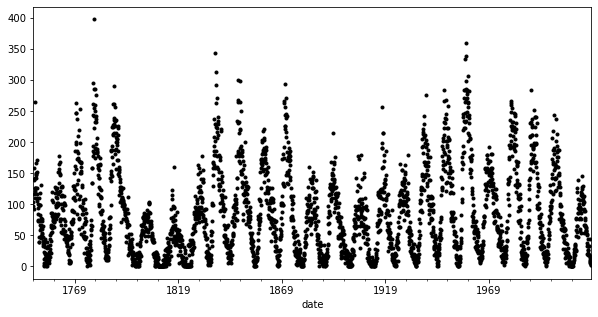

In [14]:
fig = plt.figure(figsize = (10,5))
sunspots_idx['monthly_mean_total_sunspot_number'].plot(style = 'k.')

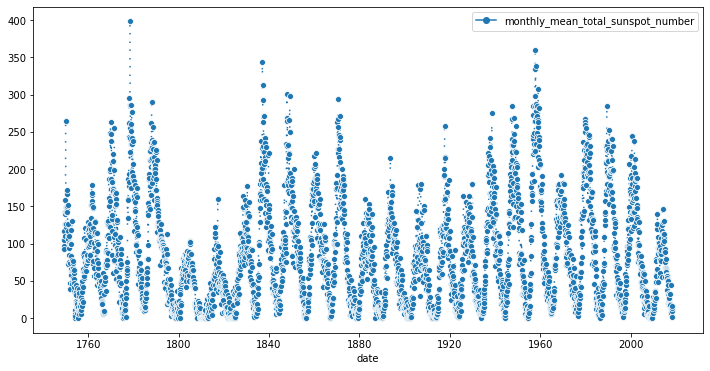

In [17]:
fig = plt.figure(figsize = (12,6))

sns.lineplot(
    data=sunspots_idx, linestyle=(0, (1, 10)),
    markers=True, dashes=False
)

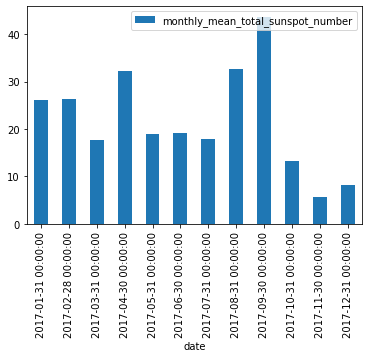

In [19]:
#sunspots in 2017 bekijken
sunspots_idx['2017'].resample('M').mean().plot(kind='bar')


In [20]:
#resampling van de data naar kwartaal niveau
sunspots_q = sunspots_idx.resample('q').mean()

In [42]:
import statsmodels.tsa as sm


#Function for checking whether the series is stationary or not
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(data):
    result = sm.stattools.adfuller(data)
    labels =['ADF Tesr Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [44]:
adfuller_test(sunspots_q)

ADF Tesr Statistic:-10.461556301267732
p-value:1.3549141728587752e-18
Lags Used:11
Number of Observations Used:1067
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [21]:
sunspots_q.head()

,monthly_mean_total_sunspot_number
date,
1749-03-31,105.900000
1749-06-30,124.566667
1749-09-30,131.666667
1749-12-31,177.366667
1750-03-31,132.466667


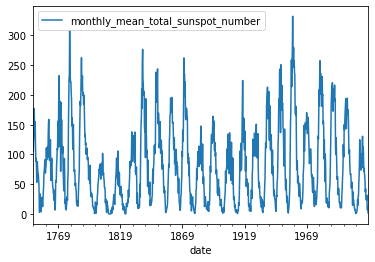

In [45]:
sunspots_q.plot()

In [46]:
#base model
base_data = sunspots_q.copy()